In [1]:

import pandas as pd
import pandas_datareader
import matplotlib.pyplot as plt
import numpy as np


def pull_vix_from_fred(start, end):
    """
    pull VIX data from FRED
    """
    df = pandas_datareader.get_data_fred("VIXCLS", start=start, end=end)
    return df

In [2]:
# read in VIX data
vix = pull_vix_from_fred("2017-01-01", "2024-01-01")

# rename columns to 'vix'
vix.columns = ['vix']

# missing value: stock market holiday, so drop them
vix = vix.dropna()
vix

,vix
DATE,
2017-01-03,12.85
2017-01-04,11.85
2017-01-05,11.67
2017-01-06,11.32
2017-01-09,11.56
...,...
2023-12-22,13.03
2023-12-26,12.99
2023-12-27,12.43


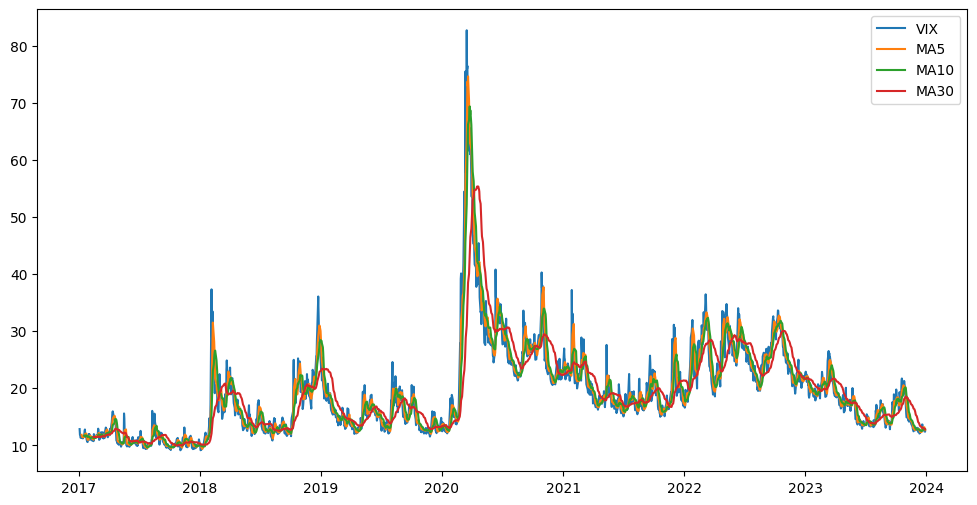

In [3]:

# calculate moving average: 5, 10, 30
vix['ma5'] = vix['vix'].rolling(window=5).mean()
vix['ma10'] = vix['vix'].rolling(window=10).mean()
vix['ma30'] = vix['vix'].rolling(window=30).mean()

# plot VIX and moving averages
plt.figure(figsize=(12, 6))
plt.plot(vix['vix'], label='VIX')
plt.plot(vix['ma5'], label='MA5')
plt.plot(vix['ma10'], label='MA10')
plt.plot(vix['ma30'], label='MA30')
plt.legend()
plt.show()

In [4]:
# create new columns that indicate whether VIX is above moving averages
vix['vix_above_ma5'] = vix['vix'] > vix['ma5']
vix['vix_above_ma10'] = vix['vix'] > vix['ma10']
vix['vix_above_ma30'] = vix['vix'] > vix['ma30']

vix['vix_above_ma5'].value_counts()

vix_above_ma5
False    980
True     792
Name: count, dtype: int64

In [5]:
ED_tickers = pd.read_csv('results.csv')

# drop columns that are not needed like 'Unnamed: 0', 'Index'
ED_tickers = ED_tickers.drop(columns=['Unnamed: 0', 'index', 'Unnamed: 0.1'])

ED_tickers

,Short_ticker,Name,Ticker,Date,Event Type,Adjusted Trading Date,trade_entry,trade_exit,stock_price_entry,stock_price_exit,...,straddle_entry_strike,IV_25c,IV_25p,IV_10c,IV_10p,IV_50c,skew_25,skew_25_decile,kurt_25,kurt_25_decile
0,A,Agilent Technologies Inc,A US,2018-02-14 16:05:00,ER,2018-02-15 00:00:00+00:00,2018-02-14,2018-02-15,69.70,72.02000,...,70000.0,NaN,0.594952,NaN,0.593143,0.577625,NaN,NaN,NaN,NaN
1,A,Agilent Technologies Inc,A US,2018-05-14 16:05:00,ER,2018-05-15 00:00:00+00:00,2018-05-14,2018-05-15,69.21,62.50000,...,NaN,0.532359,NaN,NaN,0.625772,0.570963,NaN,NaN,NaN,NaN
2,A,Agilent Technologies Inc,A US,2018-08-14 16:05:00,ER,2018-08-15 00:00:00+00:00,2018-08-14,2018-08-15,66.75,64.73000,...,67500.0,0.841737,0.995516,0.956398,0.948521,0.948011,-0.721488,"(-0.762, -0.586]",-1.635179,"(-1.869, -1.159]"
3,A,Agilent Technologies Inc,A US,2018-11-19 16:05:00,ER,2018-11-20 00:00:00+00:00,2018-11-19,2018-11-20,62.61,67.52000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A,Agilent Technologies Inc,A US,2019-02-20 16:05:00,ER,2019-02-21 00:00:00+00:00,2019-02-20,2019-02-21,78.56,77.89000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19471,ZTS,Zoetis Inc,ZTS US,2023-02-14 07:00:00,ER,2023-02-13 00:00:00+00:00,2023-02-13,2023-02-14,163.14,171.89999,...,NaN,NaN,NaN,0.516541,0.689797,0.461846,NaN,NaN,NaN,NaN
19472,ZTS,Zoetis Inc,ZTS US,2023-05-04 07:00:00,ER,2023-05-03 00:00:00+00:00,2023-05-03,2023-05-04,177.73,178.47000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19473,ZTS,Zoetis Inc,ZTS US,2023-08-08 07:00:00,ER,2023-08-07 00:00:00+00:00,2023-08-07,2023-08-08,180.69,189.30000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19474,ZTS,Zoetis Inc,ZTS US,2023-11-02 07:00:00,ER,2023-11-01 00:00:00+00:00,2023-11-01,2023-11-02,151.44,160.91000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 1. long/short straddle: vix versus moving average

The VIX Index is a calculation designed to produce a measure of constant, 30-day expected volatility of the U.S. stock market, derived from real-time, mid-quote prices of S&P 500® Index (SPX℠) call and put options. On a global basis, it is one of the most recognized measures of volatility -- widely reported by financial media and closely followed by a variety of market participants as a daily market indicator.

If VIX is greater than moving average, it suggests the market would be volatile than previous days, buying straddle would be more appealing.

In [6]:
def vix_ma_pnl(row):
    try:
        vix_above_ma5 = vix.loc[row['trade_entry']]['vix_above_ma5']
        vix_above_ma10 = vix.loc[row['trade_entry']]['vix_above_ma10']
        vix_above_ma30 = vix.loc[row['trade_entry']]['vix_above_ma30']
    except:
        return np.nan*3
    
    if vix_above_ma5:
        vix_ma5_pnl = 1000 * (row['straddle_exit_mid'] - row['straddle_entry_mid']) / row['straddle_entry_mid']
    else:
        vix_ma5_pnl = 1000 * (row['straddle_entry_mid'] - row['straddle_exit_mid']) / row['straddle_entry_mid']
    
    if vix_above_ma10:
        vix_ma10_pnl = 1000 * (row['straddle_exit_mid'] - row['straddle_entry_mid']) / row['straddle_entry_mid']
    else:   
        vix_ma10_pnl = 1000 * (row['straddle_entry_mid'] - row['straddle_exit_mid']) / row['straddle_entry_mid']

    if vix_above_ma30:
        vix_ma30_pnl = 1000 * (row['straddle_exit_mid'] - row['straddle_entry_mid']) / row['straddle_entry_mid']
    else:
        vix_ma30_pnl = 1000 * (row['straddle_entry_mid'] - row['straddle_exit_mid']) / row['straddle_entry_mid']
    
    return [vix_ma5_pnl, vix_ma10_pnl, vix_ma30_pnl]

In [7]:
ED_tickers[['vix_ma5_pnl', 'vix_ma10_pnl', 'vix_ma30_pnl']] = ED_tickers.apply(vix_ma_pnl, axis=1, result_type='expand')

# sum the pnl for each strategy
ED_tickers[['vix_ma5_pnl','vix_ma10_pnl', 'vix_ma30_pnl']].sum()

vix_ma5_pnl     -52767.116752
vix_ma10_pnl    -54247.111261
vix_ma30_pnl   -130257.350040
dtype: float64

In [8]:
# group by 'year_entry', and sum the pnl for each strategy
ED_tickers.groupby('year_entry')[['vix_ma5_pnl','vix_ma10_pnl', 'vix_ma30_pnl']].sum()

,vix_ma5_pnl,vix_ma10_pnl,vix_ma30_pnl
year_entry,,,
2018,-21659.091079,-14315.176939,-26520.017992
2019,-38863.167993,-38901.177803,-44684.872098
2020,993.994874,-11952.527362,6461.340294
2021,5321.246978,10429.139847,-34281.168906
2022,6487.883761,7624.575471,-23612.754945
2023,-5047.983294,-7131.944475,-7619.876392
2024,0.000000,0.000000,0.000000


- This strategy can't generate profit. If we reverse the strategy it could, but it doesn't match intuition.
- When groupby year, we can see that most of the loss comes from 2018 and 2019, where VIX index was relatively low. 
- Next try: don't use moving average, set threshold for VIX. If it's greater than threshold, buy straddle, otherwise sell.

# 2.Long/Short Straddle: VIX versus threshold


- Method: If VIX is greater than a threshold like 20, it means market is expected to be volatile. Therefore, we can long the straddle and sell it afterwards if VIX is greater than the threshold.
- Result: Grouping the pnl by year, it shows that this method has negative pnl all years, which suggests the reverse way is profitable: short straddle if VIX is greater than the threshold.
- Reason: still trying to figure out the logic why we want to short straddle if VIX is big.


- possible explaination: If the VIX is too high, the market realized volatility may not attain its level, which would lead to that market may not be so volatile as expected. Therefore, when VIX is too high, we sell the straddle since the market wouldn't ahieve this high volatility.

In [9]:
def vix_threshold_pnl(row):
    # pick VIX threshold: 20, 25, 30
    try:
        vix_today = vix.loc[row['trade_entry']]['vix']
        thresholds = [20, 25, 30]
    except:
        return [np.nan, np.nan, np.nan]
    pnl = []
    
    for threshold in thresholds:
        if vix_today > threshold:
            pnl.append(1000 * (row['straddle_exit_mid'] - row['straddle_entry_mid']) / row['straddle_entry_mid'])
        else:
            pnl.append(1000 * (row['straddle_entry_mid'] - row['straddle_exit_mid']) / row['straddle_entry_mid'])

    return pnl


In [10]:
ED_tickers[['vix_threshold_20_pnl', 'vix_threshold_25_pnl', 'vix_threshold_30_pnl']] = ED_tickers.apply(vix_threshold_pnl, axis=1, result_type='expand')

# sum the pnl for each strategy
ED_tickers[['vix_threshold_20_pnl', 'vix_threshold_25_pnl', 'vix_threshold_30_pnl']].mean()

vix_threshold_20_pnl   -26.802754
vix_threshold_25_pnl   -28.728577
vix_threshold_30_pnl   -18.733622
dtype: float64

In [11]:
# group by 'year_entry', and sum the pnl for each strategy
ED_tickers.groupby('year_entry')[['vix_threshold_20_pnl', 'vix_threshold_25_pnl', 'vix_threshold_30_pnl']].mean()

,vix_threshold_20_pnl,vix_threshold_25_pnl,vix_threshold_30_pnl
year_entry,,,
2018,-24.923328,-23.336437,-23.380095
2019,-36.529233,-40.380831,-40.380831
2020,-29.679993,-41.834096,-20.620016
2021,-19.670735,-16.196215,-15.410209
2022,-16.989696,-23.774368,2.650584
2023,-42.377467,-7.015307,-7.015307
2024,NaN,NaN,NaN
